# Credit Card Default Analysis

## Sub Title

Description:

Objective:

Data:




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
color = sns.color_paletter()
import sklearn.metrics as metric

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import Code

db=pd.read_csv("CreditCardDefault.csv")

# Visualise Data

db.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT4,PAY_AMT5,PAY_AMT6,Pay%1,Pay%2,Pay%3,default,FICO
0,4,50000.0,2,2,1,37,28314.0,28959,29547,1111.0,1169.0,1111,0.04,0.04,0.04,0,MT700
1,15,250000.0,1,1,2,29,59696.0,56875,55512,3111.0,3111.0,3111,0.05,0.05,0.06,0,MT700
2,17,20000.0,1,1,2,24,18338.0,17915,19114,1.0,1651.0,1,0.00,0.09,0.00,1,LT500
3,18,320000.0,1,1,1,49,71174.0,5856,195599,21111.0,195599.0,51111,0.30,33.40,0.26,0,MT700
4,21,130000.0,2,3,2,39,21616.0,11812,931,2111.0,931.0,33764,0.10,0.08,36.27,0,MT700


In [4]:
db.columns = db.columns.str.replace('%', ' ')

In [8]:
# Validate number of Rows and Columns

print('The row count is (observations)', db.shape[0],'\n' 'The column count is (variables)', db.shape[1])

The row count is (observations) 4246 
The column count is (variables) 17


In [9]:
# Check the data types of all variables
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4246 entries, 0 to 4245
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         4246 non-null   int64  
 1   LIMIT_BAL  4246 non-null   float64
 2   SEX        4246 non-null   int64  
 3   EDUCATION  4246 non-null   int64  
 4   MARRIAGE   4246 non-null   int64  
 5   AGE        4246 non-null   int64  
 6   BILL_AMT4  4246 non-null   float64
 7   BILL_AMT5  4246 non-null   int64  
 8   BILL_AMT6  4246 non-null   int64  
 9   PAY_AMT4   4246 non-null   float64
 10  PAY_AMT5   4246 non-null   float64
 11  PAY_AMT6   4246 non-null   int64  
 12  Pay 1      4246 non-null   float64
 13  Pay 2      4246 non-null   float64
 14  Pay 3      4246 non-null   float64
 15  default    4246 non-null   int64  
 16  FICO       4246 non-null   object 
dtypes: float64(7), int64(9), object(1)
memory usage: 564.0+ KB


In [14]:
# Check for duplicated values

db.duplicated().sum()

0

In [15]:
#Check for null values

db.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
Pay 1        0
Pay 2        0
Pay 3        0
default      0
FICO         0
dtype: int64

#### Commentary:

1. There are no Null values and no duplicated values,

2. There are 4246 rows and 17 Columns, of which 7 are floats, 1 is object and the 9 are integer values.
    - Looking at the actual columns Gender, Education, and Marriage need to be converted to object datatypes as they are character values.

In [16]:
# Convert to Object Dtype

db['SEX']= db['SEX'].astype('object')
db['EDUCATION'] = db['EDUCATION'].astype('object')
db['MARRIAGE'] = db['MARRIAGE'].astype('object')

In [17]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4246 entries, 0 to 4245
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         4246 non-null   int64  
 1   LIMIT_BAL  4246 non-null   float64
 2   SEX        4246 non-null   object 
 3   EDUCATION  4246 non-null   object 
 4   MARRIAGE   4246 non-null   object 
 5   AGE        4246 non-null   int64  
 6   BILL_AMT4  4246 non-null   float64
 7   BILL_AMT5  4246 non-null   int64  
 8   BILL_AMT6  4246 non-null   int64  
 9   PAY_AMT4   4246 non-null   float64
 10  PAY_AMT5   4246 non-null   float64
 11  PAY_AMT6   4246 non-null   int64  
 12  Pay 1      4246 non-null   float64
 13  Pay 2      4246 non-null   float64
 14  Pay 3      4246 non-null   float64
 15  default    4246 non-null   int64  
 16  FICO       4246 non-null   object 
dtypes: float64(7), int64(6), object(4)
memory usage: 564.0+ KB


In [18]:
# Check basic measures of descriptive statistics for continuous variables

db.describe()

,ID,LIMIT_BAL,AGE,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT4,PAY_AMT5,PAY_AMT6,Pay 1,Pay 2,Pay 3,default
count,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000
mean,15067.475742,157117.286858,35.047574,57061.098917,53771.845973,51647.689590,5616.298398,5193.867640,5717.024494,0.566373,0.549659,0.681941,0.227037
std,8527.469399,130528.792785,9.110943,68727.390542,64368.227196,62985.909815,14647.382789,14114.021638,16549.440680,3.454705,3.953106,4.462142,0.418966
min,4.000000,10000.000000,21.000000,511.000000,511.000000,511.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,7790.000000,50000.000000,28.000000,13726.500000,12985.000000,11514.750000,1111.000000,1111.000000,911.000000,0.030000,0.040000,0.030000,0.000000
50%,15158.000000,120000.000000,33.000000,31130.500000,28922.500000,28138.000000,2136.000000,2111.000000,2111.000000,0.040000,0.050000,0.040000,0.000000
75%,22293.750000,230000.000000,41.000000,74406.750000,71826.500000,68806.500000,5111.000000,5111.000000,5111.000000,0.120000,0.140000,0.140000,0.000000
max,30000.000000,1000000.000000,73.000000,891586.000000,927171.000000,961664.000000,321118.000000,417991.000000,261111.000000,106.560000,129.650000,153.330000,1.000000


#### Commentary:

1. 

2.

3.

In [19]:
db['SEX'].value_counts()

2    2530
1    1716
Name: SEX, dtype: int64

In [22]:
db['EDUCATION'].value_counts()

2    2109
1    1416
3     721
Name: EDUCATION, dtype: int64

In [23]:
db['MARRIAGE'].value_counts()

2    2324
1    1861
3      58
0       3
Name: MARRIAGE, dtype: int64

In [25]:
db['MARRIAGE'] = np.where(db['MARRIAGE'] == 1,1,0)

In [26]:
db['MARRIAGE'].value_counts()

0    2385
1    1861
Name: MARRIAGE, dtype: int64

In [27]:
db['default'].value_counts()

0    3282
1     964
Name: default, dtype: int64

In [29]:
# Check the proportion of defaults 

db.default.sum() / len(db.default)

0.22703721149317005

#### Commentary:

- 

In [30]:
db.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT4,PAY_AMT5,PAY_AMT6,Pay 1,Pay 2,Pay 3,default,FICO
0,4,50000.0,2,2,1,37,28314.0,28959,29547,1111.0,1169.0,1111,0.04,0.04,0.04,0,MT700
1,15,250000.0,1,1,0,29,59696.0,56875,55512,3111.0,3111.0,3111,0.05,0.05,0.06,0,MT700
2,17,20000.0,1,1,0,24,18338.0,17915,19114,1.0,1651.0,1,0.00,0.09,0.00,1,LT500
3,18,320000.0,1,1,1,49,71174.0,5856,195599,21111.0,195599.0,51111,0.30,33.40,0.26,0,MT700
4,21,130000.0,2,3,0,39,21616.0,11812,931,2111.0,931.0,33764,0.10,0.08,36.27,0,MT700


In [32]:
# drop redundant variable i.e. columns

db = db.drop(['ID', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6' ], axis = 1)

In [33]:
db.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Pay 1,Pay 2,Pay 3,default,FICO
0,50000.0,2,2,1,37,0.04,0.04,0.04,0,MT700
1,250000.0,1,1,0,29,0.05,0.05,0.06,0,MT700
2,20000.0,1,1,0,24,0.00,0.09,0.00,1,LT500
3,320000.0,1,1,1,49,0.30,33.40,0.26,0,MT700
4,130000.0,2,3,0,39,0.10,0.08,36.27,0,MT700


In [35]:
# Create dummy variables

db_dummy =pd.get_dummies(db, drop_first=True)
db_dummy.head()

,LIMIT_BAL,MARRIAGE,AGE,Pay 1,Pay 2,Pay 3,default,SEX_2,EDUCATION_2,EDUCATION_3,FICO_MT700
0,50000.0,1,37,0.04,0.04,0.04,0,1,1,0,1
1,250000.0,0,29,0.05,0.05,0.06,0,0,0,0,1
2,20000.0,0,24,0.00,0.09,0.00,1,0,0,0,0
3,320000.0,1,49,0.30,33.40,0.26,0,0,0,0,1
4,130000.0,0,39,0.10,0.08,36.27,0,1,0,1,1


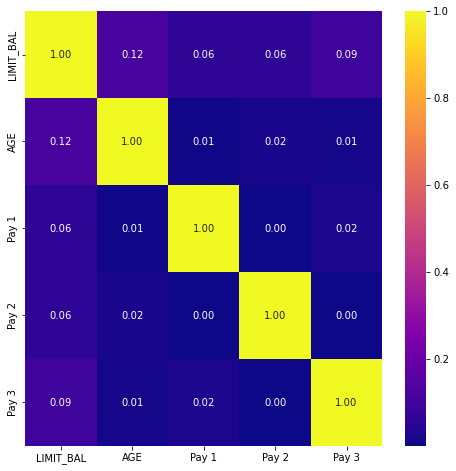

In [39]:
plt.subplots(figsize = (8,8))
sns.heatmap(db_dummy[['LIMIT_BAL', 'AGE', 'Pay 1','Pay 2', 'Pay 3']] .corr(), annot = True, cmap = 'plasma', fmt = '.2f');

#### Comment: 



## Building model

In [40]:
# Import Statsmodle modules to build logistic regression model

import statsmodels.formula.api as sm

In [58]:
X = db_dummy.drop(['default'], axis=1)
y = db_dummy['default']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=142,stratify=db_dummy['default'])

# statsmodel requires the labelled data, therefore, concatinating the y lable to the train set.

db_train = pd.concat([X_train,y_train], axis=1)
db_test = pd.concat([X_test,y_test], axis=1)

#### Commentary: 

In [59]:
#Descriptive statistics of Target Variable

db_train['default'].value_counts()

0    2625
1     771
Name: default, dtype: int64

In [60]:
# Check for balance of dataset

db_train.default.sum() / len(db_train.default)

0.22703180212014135

### Feature Selection

The best approach is to perform extensive EDA on the dataset to understand properties of the predictors, however it's not always the best method. For this model I am using feature selection to tune down the number of predictor variables used by the model to make a simpler model to train and to understand and in turn easier to run and less time consuming.

### First Model

In [61]:
db_train.head()

,LIMIT_BAL,MARRIAGE,AGE,Pay 1,Pay 2,Pay 3,SEX_2,EDUCATION_2,EDUCATION_3,FICO_MT700,default
275,80000.0,1,30,0.12,0.04,0.06,1,1,0,1,0
294,50000.0,0,58,0.04,0.17,0.04,0,1,0,0,1
1226,320000.0,1,53,0.03,0.03,0.03,1,1,0,1,0
1656,50000.0,1,55,0.00,0.04,0.04,1,0,1,1,0
1051,120000.0,0,44,0.04,0.01,1.80,0,0,1,0,1


In [62]:
# Create the first model using all variables

model_1 = sm.logit(formula = 'default ~ LIMIT_BAL + AGE + Pay 1 + Pay 2 + Pay 3 + SEX_2 + EDUCATION_2 + EDUCATION_3 + MARRIAGE + FICO_MT700', data = db_train).fit()

SyntaxError: invalid syntax (<unknown>, line 1)